<h1>Unsupervied Learning</h1>
<h3>In this notebook we will conduct  unsupervied learning for Iris datasets</h3>

<p>(Data from Fisher, 1936 https://archive.ics.uci.edu/ml/datasets/iris)</cite></p>

<p> I used, modified code and instruction in <cite><a href="https://github.com/udacity/machine-learning/tree/master/projects/customer_segments">Udacity ML nanodegree</a></cite></p>

<p>Things we will cover: data exploration, data preprocessing, PCA, k-means, t-SNE</p>

<h3>What is unsupervised Learning?</h3>
<p> It is a way of extracting useful knowlege from the data <strong>"without any label"</strong> or a way of transforming the data into meaningful format.<br>
    The emphasis is <strong>"without any label"</strong>. This contrasts with Supervised Learning where we will predict the label on the testing sets from the training sets with the labels. </p>

In [126]:
# Import necessay libraries to use in the following sections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();
%matplotlib inline
import sklearn

In [3]:
# we dont' have a header(feature names), we set header:= None
iris_data = pd.read_csv("iris.data.csv", header=None)

<h2>Data Exploration</h2>

<p>In this section, we will split the data into trainining and test set; then we will explore the dataset.</p>
<p>The dataset contains 150 samples, each with five attributes. We will drop the class name variable and conduct unsupervised learning.</p>

In [9]:
print("Num of row is: {0}, num of cols is {1}".format(iris_data.shape[0], iris_data.shape[1]))
iris_data.head()

Num of row is: 150, num of cols is 5


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
# we change the features of the data to explicit names

iris_data.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]

In [11]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
X_data = iris_data[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y_data = iris_data["class"]

In [13]:
y_data.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

In [14]:
# encoding class labels
from sklearn.preprocessing import LabelEncoder
le  = LabelEncoder()
y_data_en = le.fit_transform(y_data.values)
print(y_data_en[:10])
print(y_data_en)

[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [15]:
# print the encoding labels
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [23]:
# By default, train and test set will be splitted into 0.75% and 0.25% of original dataset
# By default, dataset is shuffled before the split
# set random_state in order for later replication(we can replicate the result this way since
# same split will occur if we use the same random_state number)
# we will use whole datasets as training data and use split to just shuffle the data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data_en, 
                                                    test_size = 0, random_state=7)

In [26]:
print("X_train and X_test shape : {0} vs {1}".format(X_train.shape, X_test.shape) )
print("y_train and y_test shape : {0} vs {1}".format(y_train.shape, y_test.shape))

X_train and X_test shape : (150, 4) vs (0, 4)
y_train and y_test shape : (150,) vs (0,)


In [30]:
# check the random order of data (check whether data was shuffled or not)
print(y_train[:20])

[2 1 0 1 2 0 1 1 0 1 1 1 0 2 0 1 2 2 0 0]


In [31]:
# inspect the numerical reprensentation of each feature
X_train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<h3>Selecting samples</h3>
<p>we will select three samples to explore them later. We will choose them so that they 
    is distinct (each feature value are different) from each other</p>
    
<p> we will choose three examples as follows:<br>
    <ol>
        <li>sample_1 = septal_length is maximum in the data</li>
        <li>sample_2 = sepal length is the closest to the mean value</li>
        <li>sample_3 = petal length is the closest to the mean value</li>
    </ol>
<p>

In [32]:
# Choose a sample whose septal_length is maximum
X_train.loc[X_train["sepal_length"] >= 7.8]

,sepal_length,sepal_width,petal_length,petal_width
131,7.9,3.8,6.4,2.0


In [33]:
sample_1 = X_train.loc[X_train["sepal_length"] >= 7.8]

In [39]:
# Choose a sample whose sepal length is the closest to the mean value
X_train.loc[(abs(X_train["sepal_length"] - X_train["sepal_length"].mean())).argmin()]

sepal_length    5.8
sepal_width     2.7
petal_length    3.9
petal_width     1.2
Name: 82, dtype: float64

In [40]:
sample_2 = X_train.loc[82]

In [42]:
# Choose a sample whose petal length is the closest to the mean value
X_train.loc[(abs(X_train["petal_length"] - X_train["petal_length"].mean())).argmin()]

sepal_length    5.5
sepal_width     2.4
petal_length    3.8
petal_width     1.1
Name: 80, dtype: float64

In [43]:
sample_3 = X_train.loc[80]

In [44]:
# create a holder for the three samples chosen
samples = [sample_1, sample_2, sample_3]

In [45]:
indices = [131, 82, 80]
samples = pd.DataFrame(X_train.loc[indices], columns=X_train.keys()).reset_index(drop=True)
print("Chosen samples of iris dataset")
samples

Chosen samples of iris dataset


,sepal_length,sepal_width,petal_length,petal_width
0,7.9,3.8,6.4,2.0
1,5.8,2.7,3.9,1.2
2,5.5,2.4,3.8,1.1


<h3>Feature dependence</h3>
<p>One thing we can find from data is that some feature is predictive of others. In other words, is it possible to predict the sepal length using the other 3 features? (This is one example. Target variable does not have to be a sepal length. We can choose any feature to be inspected.)</p>
<p>We will choose "sepal length" as a target class and use the other featuers for supervised learning models.</p>

In [46]:
# Copy the X_train data and split them into a target(a dependent variable) 
# and independet variables
pseudo_target = X_train['sepal_length']
pseudo_data = X_train.drop(['sepal_length'], axis=1)

# Split the data into training and testing sets: 0.75 goes to training set.
X_pseudo_train, X_pseudo_test, y_pseudo_train, y_pseudo_test\
    = train_test_split(pseudo_data, pseudo_target, random_state=7)
    
# Use a decision tree regressorn to fit and infer the target values 
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=7)
regressor.fit(X_pseudo_train, y_pseudo_train)
y_pseduo_pred = regressor.predict(X_pseudo_test)
from sklearn.metrics import r2_score
score = r2_score(y_pseudo_test, y_pseduo_pred)
print(score)

0.836542685606


<h3>The coefficient of determination, R<sup>2</sup> is 0.83</h3>
<p>So about 83% of the variance of target variable is explained by the three variables.
It is clear that there is a dependency of this target variable(petal length) on the three variables. We could drop the "petal length" feature for reducing the dimentionality.(thus
reducing the run-time cost)</p>

<h3>Visuzlize Feature Distributions</h3>

<p>In order to get sense of data, we will plot the feature distribution.
In this way, we can understand not only the each feature's distribution but also the
correlation between each feature.</p>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0e40fc50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a16cb3588>]], dtype=object)

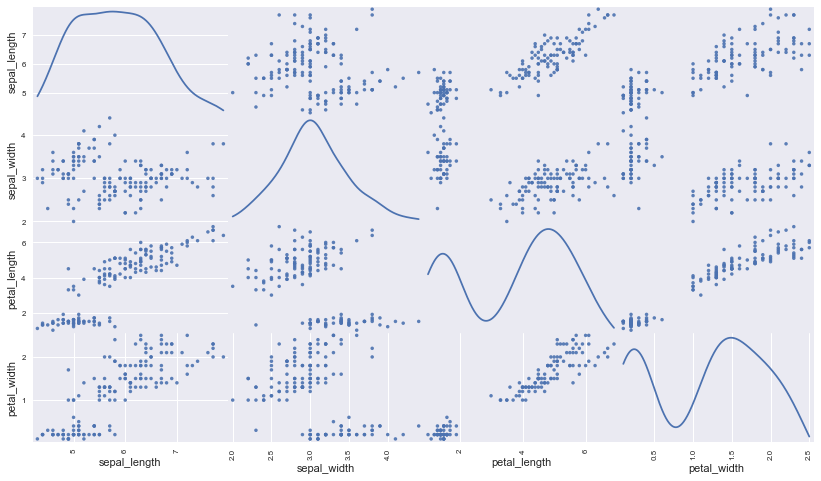

In [47]:
pd.plotting.scatter_matrix(X_train, alpha=0.9, figsize=(14, 8), diagonal="kde")


<h3>What we can infer from the data plot above</h3>

<h4>Each feature distribution:</h4><br>
<p>Sepal length and petal length are almost following normal distribution (Sepal length
does not trace the exact bell curve though).
Petal length and petal width trace<a href="http://www.statisticshowto.com/what-is-a-bimodal-distribution/"> bimodal distribution</a>(meaning that there are two groups or two most frequent samples) </p>


<h4>Correlation:</h4>
<p>Positive correlation can be seen between 'sepal_length' and 'petal_length', between 'petal_length'  and 'petal_width'. 'Septal_length' and 'petal_width' are somewhat correlated positively but it is not clear.</p>

We can confirm the correlation we inferred above by using the heatmap.

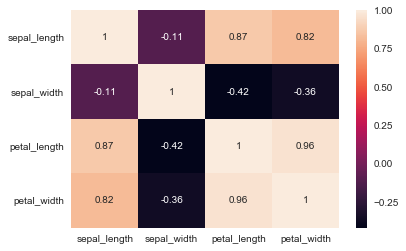

In [48]:
sns.heatmap(X_train.corr(), annot=True)

<h3>Our inference is confirmed.</h3>

<p>Positive correlation ( in decreasing order ) for 3 distributions:
    <ol>
        <li>0.96 for "petal_length" and "petal_width"</li>
        <li>0.87 for "sepal_length" and "petal_length"</li>
        <li>0.82 for "petal_width" and "sepal_length"</li>
    </ol></p>

<h2>Data Preprocessig</h2>
<p>We will transform the data into an appropriate distribution.<br>
We will also detect outliers and deal with them.</p>

<p>Some machine-leanrning algorithms are sensetive to the data distribution. It is often preferable to pre-scale the datasets</p>
<p>We will scale dataset (StandardScaler in this case) so that each feature will have zero mean and unit variance.(This does not necessarily mean that each feature will trace Gaussian Distribution)</p>

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
samples_scaled = scaler.transform(samples)
print("Mean of value for each feature before scaling\n{0}".format(X_train.mean(axis=0)))
print("Variance of value for each feature before scaling\n{0}".format(X_train.var(axis=0)))
print("Mean of value for each feature after scaling\n{0}".format(X_train_scaled.mean(axis=0)))
print("Vaiance of value for each feature after scaling\n{0}".format(X_train_scaled.var(axis=0)))

Mean of value for each feature before scaling
sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64
Variance of value for each feature before scaling
sepal_length    0.685694
sepal_width     0.188004
petal_length    3.113179
petal_width     0.582414
dtype: float64
Mean of value for each feature after scaling
[ -4.45569507e-16  -6.48370246e-16   2.75335310e-16  -1.34707060e-16]
Vaiance of value for each feature after scaling
[ 1.  1.  1.  1.]


In [51]:
X_train_scaled_df = pd.DataFrame({"sepal_length": X_train_scaled[:,0], 
                                  "sepal_width": X_train_scaled[:, 1],
                                  "petal_length": X_train_scaled[:, 2], 
                                  "petal_width": X_train_scaled[:, 3]})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a172015c0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a174c87f0>]], dtype=object)

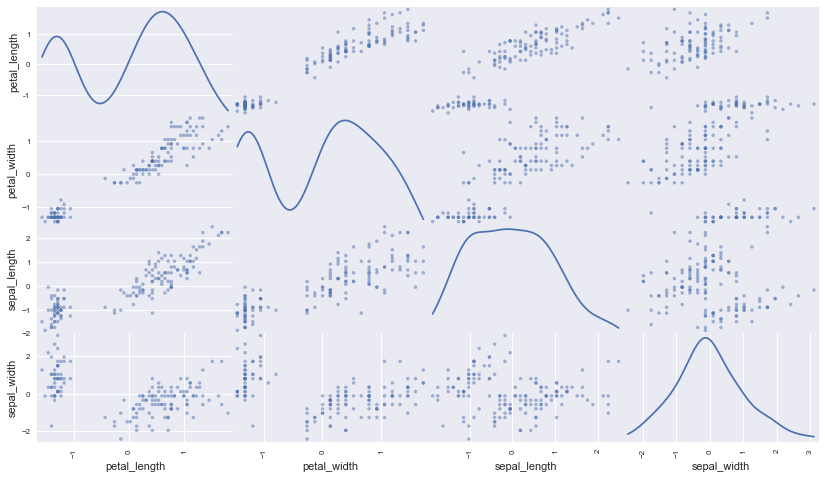

In [52]:
pd.plotting.scatter_matrix(X_train_scaled_df, figsize=(14, 8), diagonal="kde")

In [53]:
samples_scaled_df = pd.DataFrame({"sepal_length": samples_scaled[:,0], 
                                  "sepal_width": samples_scaled[:, 1],
                                  "petal_length": samples_scaled[:, 2], 
                                  "petal_width": samples_scaled[:, 3]})
samples_scaled_df

,petal_length,petal_width,sepal_length,sepal_width
0,1.502013,1.053537,2.492019,1.726266
1,0.080370,0.001753,-0.052506,-0.819166
2,0.023504,-0.129720,-0.416010,-1.513375


<h3>Outlier detection</h3>
<p>We will detect outliers and deal with them</p>
<p> We will use <a href="http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/">Turkey's Method for identifying outliers</a> for identifying outliers</p>

In [56]:
outliers = []

for feature in X_train_scaled_df.keys():
    q1 = np.percentile(X_train_scaled_df[feature], 25, axis=0)
    q3 = np.percentile(X_train_scaled_df[feature], 75, axis=0)
    step = 1.5 * float(q3-q1)
    print("Data points considered outliers for the feature {0}".format(feature))
    
    X_train_scaled_df[~((X_train_scaled_df[feature] >= q1 - step)&(X_train_scaled_df[feature] <= q3+step))]

Data points considered outliers for the feature petal_length
Data points considered outliers for the feature petal_width
Data points considered outliers for the feature sepal_length
Data points considered outliers for the feature sepal_width


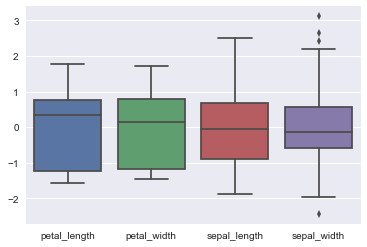

In [58]:
sns.boxplot(data=X_train_scaled_df)

<p>Fowllowing Turkey's Method for identifying outliers, 
we do not have outliers in this datasets</p>

<h2>Feature transformation</h2>
<p>We will see the underlying structure of the data</p>

<h3>PCA for reducing dimesionality</h3>

In [59]:
from sklearn.decomposition import PCA
pca = PCA(random_state=7)
pca.fit(X_train_scaled)
pca_X_train = pca.transform(X_train_scaled)
pca_samples = pca.transform(samples_scaled)

In [63]:
def pca_components(data, pca):
    '''
    Visualize the each components of pca fitted on data.
    It shows the feature weights and explained variance.
    '''
    
    # Extract index of components (count the number of components)
    dimensions = ["Principal Component {}".format(i) for i in range(1, len(pca.components_)+1)]
    # Create a dataframe: row is each dimension(component) and column is keys(features)
    components = pd.DataFrame(np.round(pca.components_,4), columns=data.keys())
    components.index = dimensions
    
    # Variance explained by each dimension(component)
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    # Create a dataframe for variance explained for each dimension
    # row is each dimension and column is variance explained
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns=["Explained Variance"])
    
    fig, ax = plt.subplots(figsize=(15, 10))
    
    # Visualize the feature weights
    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)
    
    # Display the explained variance for each dimension above the plot
    for i, var in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, 
                "Explained Vairance\n {:.4f}".format(var))
    

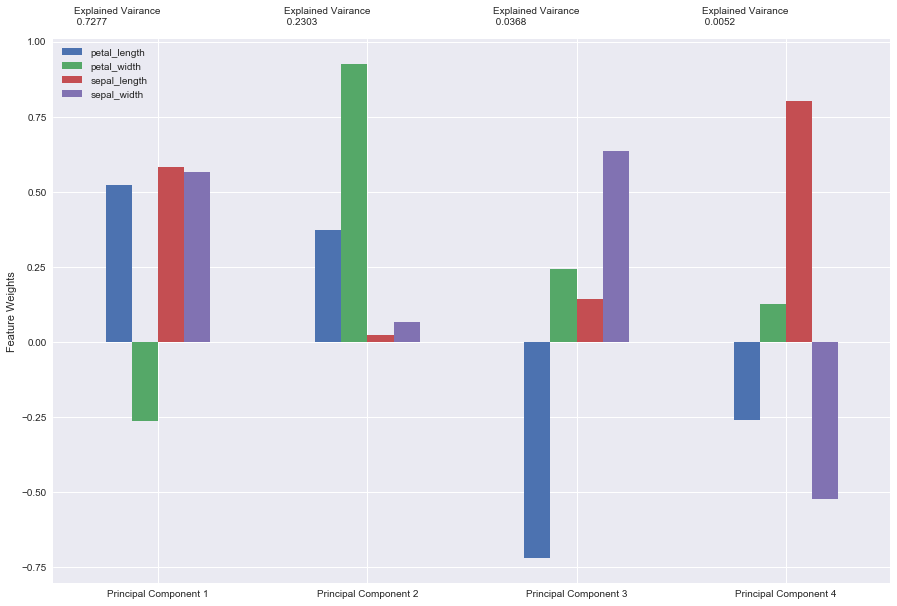

In [65]:
pca_components(X_train_scaled_df, pca)

<h3><a href="https://onlinecourses.science.psu.edu/stat505/node/54">Interpretation of Principal Components above</a></h3>
<h4>Important to Note:</h4><p> Sign (+/-) of each weight will have meaning only if they are compared to other features.
    Sign can be flipped and sign itself does not indicate anything.<br>
    We will consider the feature weight larger than 0.5 in absolute value to have strong correlation.</p>

<ol>
    <li>
      <strong>First component:</strong> This component positively correlates with "petal length", "sepal length" and "sepal_width".
        This means two things: 
      <ol> 
          <li> The three variables vary together </li>
          <li>First component can be viewed as the measure of qunatity of the "petal length", "sepal length" and                  "sepal width"</li>
      </ol>
    </li><br>
    
    <li>
      <strong>Second component:</strong> This component has positive correlation with "petal width"
      This component can be viewed as the masure of quantity(length) of "petal width".
    </li>
    
    <li>
      <strong>Third component:</strong> This component strongly corrlates with "petal length" and "sepal width" to some extent (If one feature increasing, the other one is decreasing). 
      This component can be viwed as the measure of the quantity of "petal length" and "sepal width".
    </li>
    
    <li>
      <strong>Fourth component:</strong> This component positively correlates with "sepal length".
      This component can be viewed as the measure of the quantity of sepal length(how long sepal length is).
    </li>
  
</ol>

Cumulative variance for each component [ 0.72770452  0.95800975  0.99484807  1.        ]


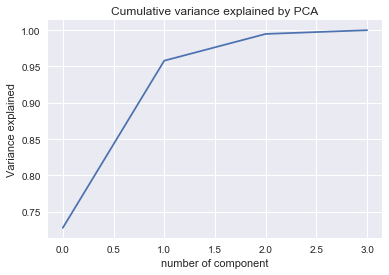

In [66]:
plt.plot(range(4), np.cumsum(pca.explained_variance_ratio_))
plt.title("Cumulative variance explained by PCA")
plt.xlabel("number of component")
plt.ylabel("Variance explained")
print("Cumulative variance for each component", np.cumsum(pca.explained_variance_ratio_))

<h3>Dimensionality Reduction</h3>
<p>PCA allows us to reduce the dimensionality of the data -- 
this will result in the less computation cost. As a side effect, total variance in the data will also decrease.<br>We will use 2 components since it captures 95% of total vairance.</p> 

In [69]:
# Apply PCA with two components
pca = PCA(n_components=2, random_state=2)

# Fit and transform the scaled data
reduced_data = pca.fit_transform(X_train_scaled)
# Fit and transform the sample data
reduced_samples = pca.transform(samples_scaled)

# Create a DataFrame for the reduced data
reduced_data_df = pd.DataFrame(reduced_data, columns = ["PCA 1", "PCA 2"])

In [70]:
pd.DataFrame(np.round(reduced_samples, 4), columns=["PCA 1", "PCA 2"])

,PCA 1,PCA 2
0,2.3161,2.6262
1,0.2360,-0.7759
2,0.1215,-1.5636


In [71]:
def biplot(original_data, reduced_data, pca):
    '''
    Create a biplot that shows a scatterplot of the reduced data 
    and the projections of the original features.
    
    '''
    fig, ax = plt.subplots(figsize=(14, 8))
    # scatterplot of the reduced data
    ax.scatter(x=reduced_data.loc[:, "PCA 1"], y=reduced_data.loc[:, "PCA 2"], 
               facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T

    # Scale factors to make the arrows easier to see
    arrow_size, text_pos = 3.0, 3.8
    
    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                 head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, original_data.columns[i], color='black', 
                ha='center', va='center', fontsize=18)
    
    ax.set_xlabel("Principal Component 1", fontsize=14)
    ax.set_ylabel("Principal Component 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16)

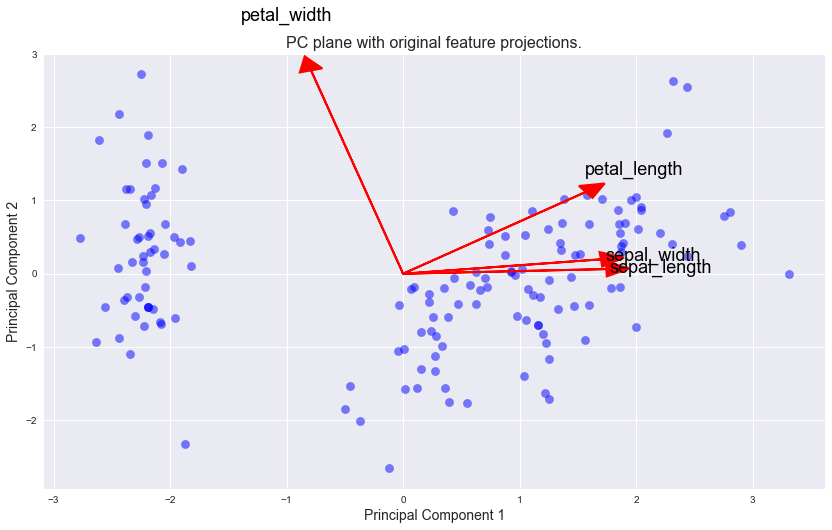

In [72]:
biplot(X_train_scaled_df, reduced_data_df, pca)

<h3>Observation</h3>
<p>We can see that right points in the middle of principal component 2 axis are iris with big(long) "petal length", 
    "sepal width" and "sepal length". <br>As we saw from the visualization of the feature weights, 
    "petal length", "sepal width" and "sepal length" are mostly strongly accociated with
    the first component, and "petal width" with the second component.
</p>

<h2>Clustering</h2>

<p>In this section, we will use K-means to cluter the datasets.<br>
We will use <a href="http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html"> Silhouette coefficients</a> to choose the number of cluster</p>

In [79]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
clusters = [i for i in range(2, 10)]
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster)
    clusterer = kmeans.fit(reduced_data)
    
    preds = clusterer.predict(reduced_data)
    centers = clusterer.cluster_centers_
    
    sample_pred = clusterer.predict(reduced_samples)
    
    score = silhouette_score(reduced_data, preds)
    print("cluster is %d, score is %f " % (cluster,score))

cluster is 2, score is 0.613037 
cluster is 3, score is 0.508155 
cluster is 4, score is 0.445313 
cluster is 5, score is 0.413809 
cluster is 6, score is 0.427851 
cluster is 7, score is 0.426982 
cluster is 8, score is 0.445488 
cluster is 9, score is 0.442099 


<p>Two clusters results in the best score even though we know that we actually have three classes
in the datasets</p>

In [83]:
# Fit a kmeans with two clusters
kmeans = KMeans(n_clusters=2, random_state=0)
clusterer = kmeans.fit(reduced_data)

preds = clusterer.predict(reduced_data)

centers = clusterer.cluster_centers_

samples_preds = clusterer.predict(reduced_samples)
print(centers)

[[ 1.11009664 -0.14611241]
 [-2.22019328  0.29222482]]


In [123]:
import matplotlib.cm as cm

def cluster_results(reduced_data, preds, centers, pca_samples):
	'''
	Visualizes the PCA-reduced cluster data in two dimensions
	Adds cues for cluster centers and student-selected sample data
	'''

	predictions = pd.DataFrame(preds, columns = ['Cluster'])
	plot_data = pd.concat([predictions, reduced_data], axis = 1)

	# Generate the cluster plot
	fig, ax = plt.subplots(figsize = (14,8))

	# Color map
	cmap = cm.get_cmap('gist_rainbow')

	# Color the points based on assigned cluster
	for i, cluster in plot_data.groupby('Cluster'):   
	    cluster.plot(ax = ax, kind = 'scatter', x = 'PCA 1', y = 'PCA 2', \
	                 color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

	# Plot centers with indicators
	for i, c in enumerate(centers):
	    ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
	               alpha = 1, linewidth = 2, marker = 'o', s=200);
	    ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

	# Plot transformed sample points 
	ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
	           s = 150, linewidth = 4, color = 'black', marker = 'x');

	# Set plot title
	ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross");


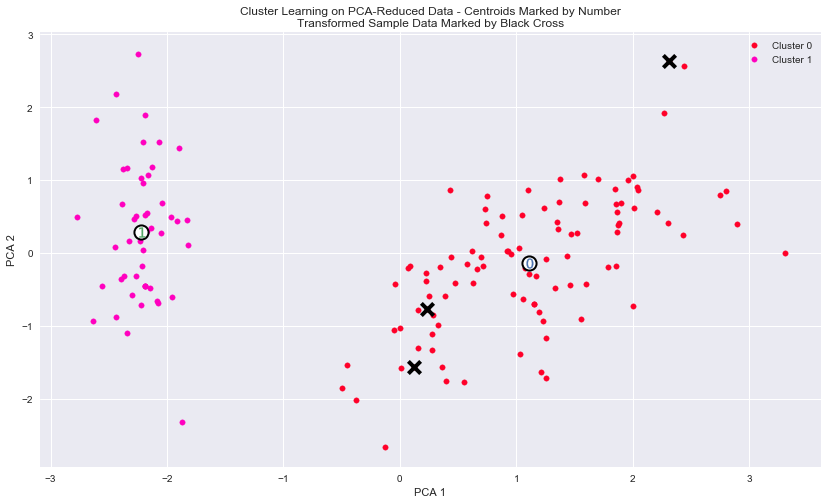

In [124]:
# Display the results of the clustering from implementation
cluster_results(reduced_data_df, preds, centers, reduced_samples)

<h3>We will use <a href="https://distill.pub/2016/misread-tsne/">t-SNE</a> to see the class distribution in two dimension</h3>
<p>t-SNE will try to find a two dimensional representation of data which will preserve the distance in the original dimension( that is to say, points that are close will remain close and points that are far away remain far away).</p>
<p><strong>Important to Note:</strong> We are able to understand the class distribution since we have ground the truth labels.</p>

Text(0.5,1,"['0: Iris-setosa', '1: Iris-versicolor', '2: Iris-virginica']")

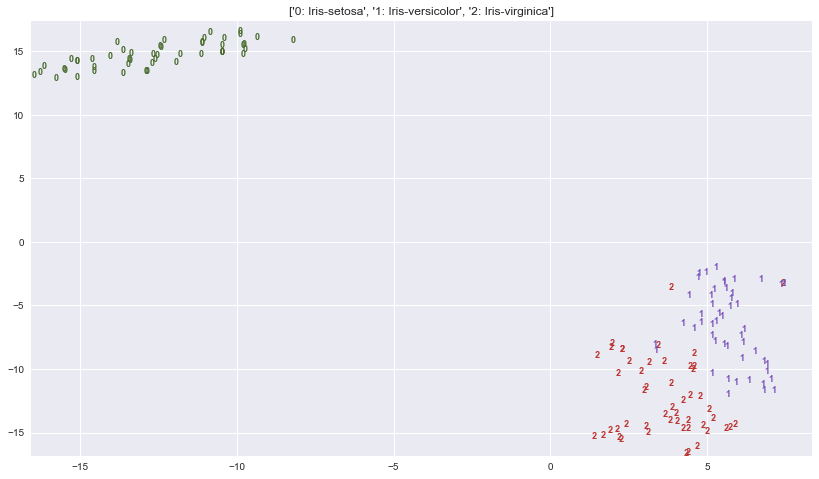

In [125]:
colors = ["#476A2A", "#7851B8", "#BD3430"]
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)

X_train_scaled_tsne = tsne.fit_transform(X_train_scaled)
plt.figure(figsize=(14, 8))
plt.xlim(X_train_scaled_tsne[:, 0].min(), X_train_scaled_tsne[:, 0].max()+1)
plt.ylim(X_train_scaled_tsne[:, 1].min(), X_train_scaled_tsne[:, 1].max()+1)
for i in range(X_train_scaled_tsne.shape[0]):
    plt.text(X_train_scaled_tsne[i, 0], X_train_scaled_tsne[i, 1],
             str(y_train[i]), 
             color = colors[y_train[i]],
             fontdict={'weight': 'bold', 'size': 9})
    
class_index = ["{0}: {1}".format(class_num, le.inverse_transform(class_num)) for class_num in [0, 1, 2]]
plt.title(class_index)

<h3>Observation</h3>
<p>We can see that class label setosa is well seprated from the other two classes, 
    versicolor and virginica.K-means might have not been able to seperate the two latter classes.</p>